# Music Generator Analysis
## Imports and Array Info Setup

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile
import random
from scipy.fftpack import fft,fftfreq


def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

## Setting up the frequencies for common chords

In [2]:
# calculate note frequencies
A_freq   = 440
Ash_freq   = A_freq * 2 ** (1 / 12)
Bfl_freq =  Ash_freq
B_freq = A_freq * 2 ** (2 / 12)
C_freq = 523.3
Csh_freq = A_freq * 2 ** (4 / 12)
E_freq   = A_freq * 2 ** (7 / 12)
D_freq = C_freq * 2 ** (2/12)
Dsh_freq = C_freq * 2 ** (3/12)
Efl_freq = Dsh_freq
E_freq = C_freq * 2 ** (4/12)
F_freq = C_freq * 2 ** (6/12)
Fsh_freq = C_freq * 2 ** (7/12)
G_freq = C_freq * 2 ** (8/12)
Gsh_freq = C_freq * 2 ** (9/12)

#The most common chords in music
C_maj = np.array([C_freq, D_freq, E_freq, F_freq, G_freq, A_freq, B_freq])
D_maj = np.array([D_freq, E_freq, Fsh_freq, G_freq, A_freq, B_freq, Csh_freq])
E_maj = np.array([E_freq, Fsh_freq, Gsh_freq, A_freq, B_freq, Csh_freq, Dsh_freq])
F_maj = np.array([F_freq, G_freq, A_freq, Bfl_freq, C_freq, D_freq, E_freq])
G_maj = np.array([G_freq, A_freq, B_freq, C_freq, D_freq, E_freq, Fsh_freq])
A_maj = np.array([A_freq, B_freq, Csh_freq, D_freq, E_freq, Fsh_freq, Gsh_freq])
B_maj = np.array([B_freq, Csh_freq, Dsh_freq, E_freq, Fsh_freq, Gsh_freq, Ash_freq])
#All possible Notes in an octave on a keyboard
All_Notes = np.array([C_freq, Csh_freq, D_freq, Dsh_freq, E_freq, F_freq, Fsh_freq, G_freq, Gsh_freq, A_freq, Ash_freq, B_freq])

## Setting up the samples per second and the relative note lengths

In [3]:
fs = 44100  # 44100 samples per second
quarter = 1
half = 2
whole = 4

# Generate array with seconds * sample_rate steps
t_q = np.linspace(0, quarter, quarter * fs, False)
t_h = np.linspace(0, half, half * fs, False)
t_w = np.linspace(0, whole, whole * fs, False)
t_lens = np.array([t_q, t_h, t_w])


C:\Users\kira\AppData\Local\Temp\ipykernel_13548\584522978.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t_lens = np.array([t_q, t_h, t_w])


# The Music Generator!
## It chooses a note randomly from the given scale and adds it to a list, whose length you define.

In [4]:
#you can give it a scale (array) and noteNum (int) number of notes and sit will return a randomly generated "song"
def musicGen(scale, noteNum):
    audioNotes = []
    for n in range(noteNum):
        note = np.sin(random.choice(scale) * random.choice(t_lens) * 2 * np.pi)
    
        audio_note = note * (2**15 - 1) / np.max( np.abs(note) )
        
        audioNotes.append(audio_note)
    
    
    # Ensure that highest value is in 16-bit range
    audio = np.hstack(audioNotes)

    audio = audio.astype(np.int16)
    return audio

## Helper function to play the music

In [5]:
def playMusic(audio):
    # Start playback
    play_obj = sa.play_buffer(audio, 1, 2, fs)
    # Wait for playback to finish before exiting
    play_obj.wait_done()


## Generating a song in C Major that is 5 notes long and playing it

In [6]:
audio = musicGen(C_maj, 5)
playMusic(audio)

## Playing around with other scales and saving them

In [7]:
#audioTest = musicGen(All_Notes, 5)
#playMusic(audioTest)
#Write("Completely_Random.wav", fs, audioTest)

## Helper function to write the song we just made to a file

In [8]:
def Write(filename,rate,data):
    wavfile.write(filename, rate, data)

## Writes the song we made to a file

In [9]:
Write("C_maj_Rand.wav", fs, audio)
filename = "C_maj_Rand.wav"
wave_obj = sa.WaveObject.from_wave_file(filename)
#Below is for testing purposes to make sure the file saved.
#play_obj = wave_obj.play()
#play_obj.wait_done()  # Wait until sound has finished playing

## Plots and reads data about the audio we created.
### Since these are pure frequencies the graph appears to be a solid block.

Data rate [units of Hz = 1/seconds] =  44100
Array: audio
shape: (705600,)
dtype: int16
min, max: -32767 32767



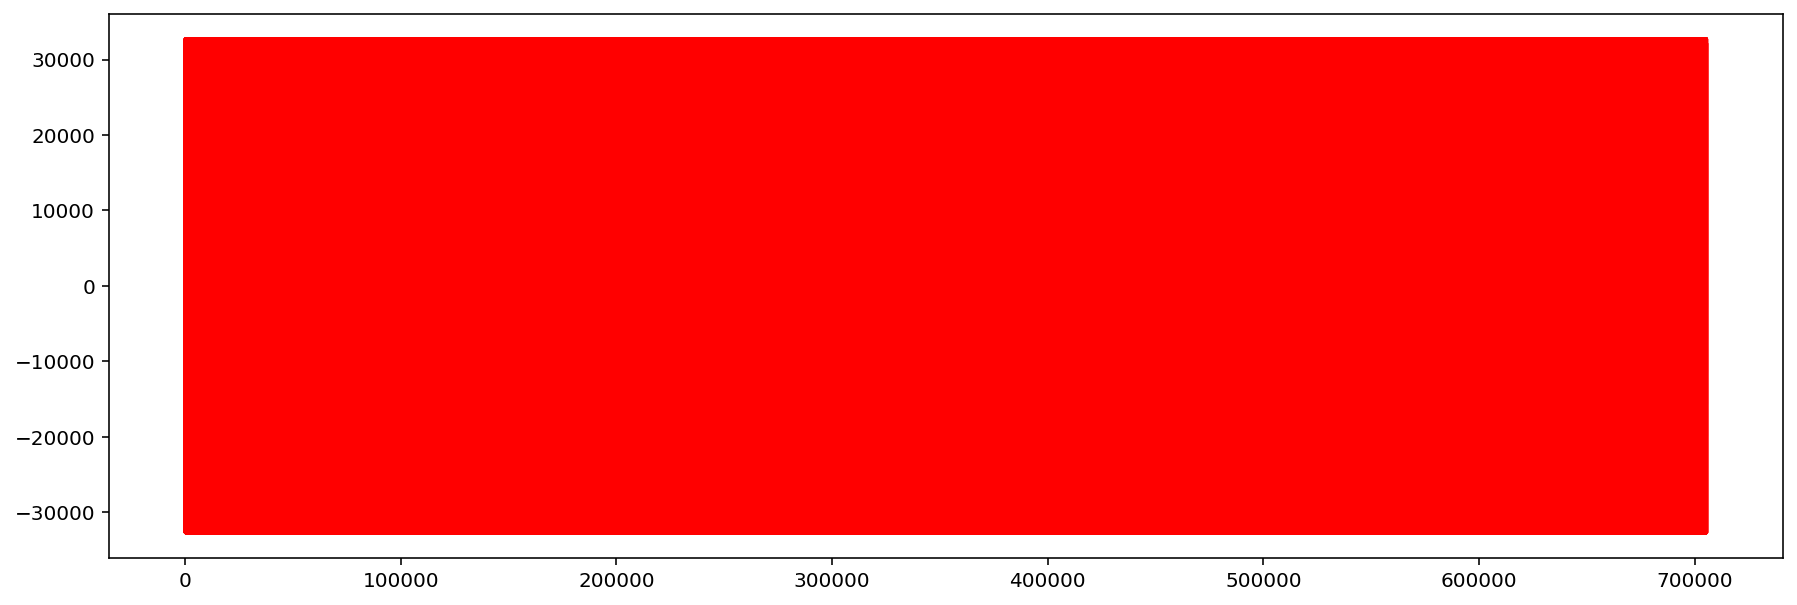

In [10]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",fs)
PrintArrayInfo(data,"audio")

plt.rcParams['figure.figsize'] = [15, 5]

plt.plot(audio,'r-')
plt.show()

## A zoomed in look
### When you're zoomed in you can tell it is a sine wave

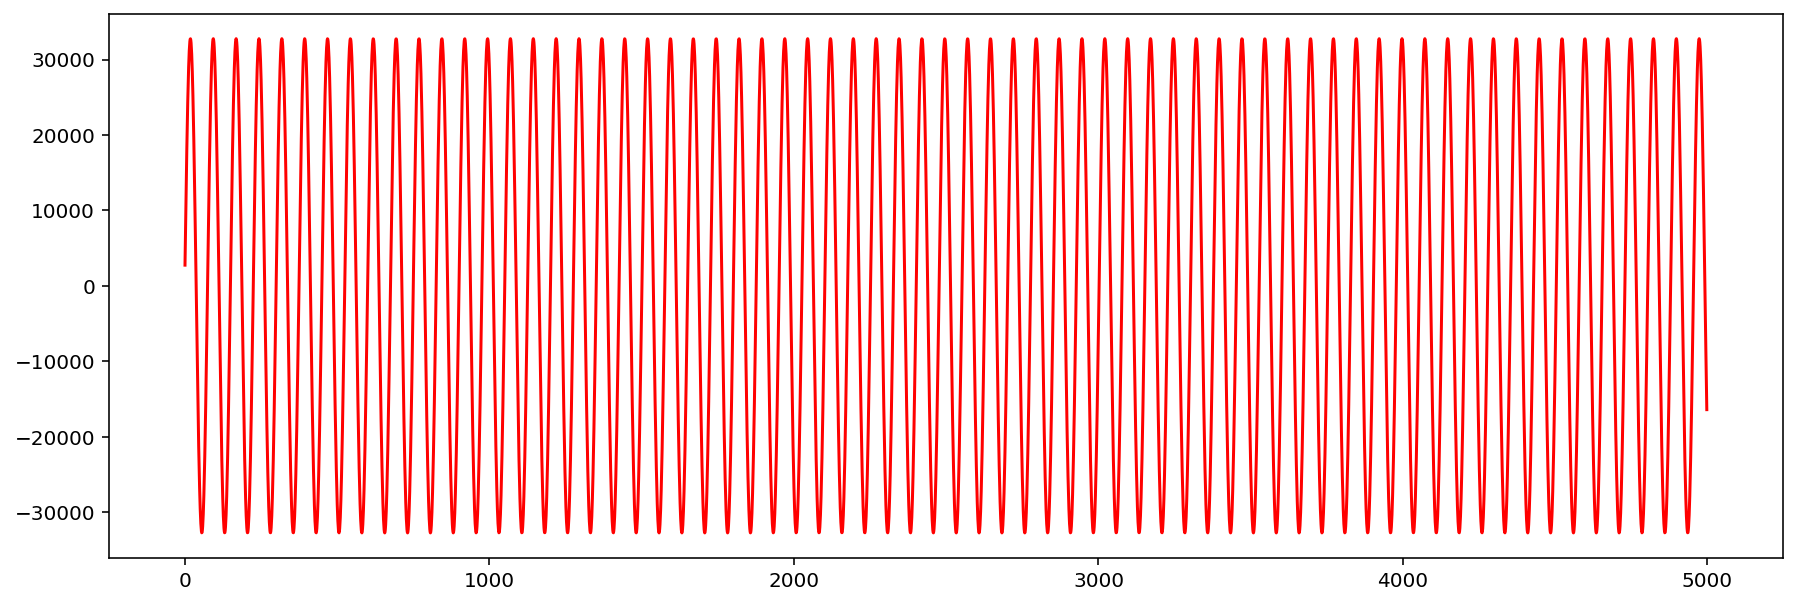

In [11]:
zoomed = data[1:5000]

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(zoomed,'r-')
plt.show()

## This shows the frequencies found in the data--higher the line more that frequency was played.

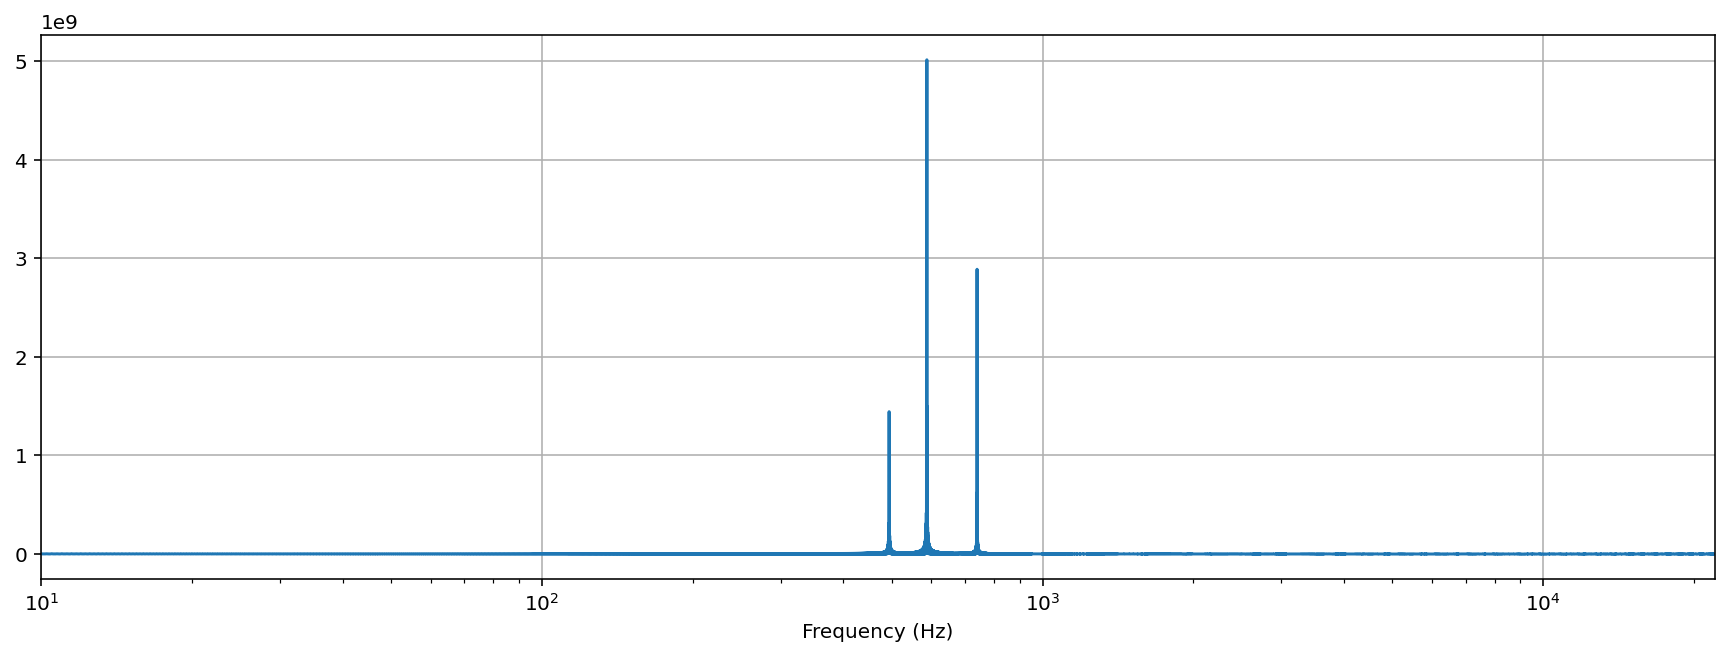

In [12]:
datafft = fft(data)
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
samples = data.shape[0]

freqs = fftfreq(samples,1/rate)
plt.xlim( [10, rate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

# Using data science to analyze how likely it is to create certain song's melodies using my Music Generator
## Creating Songs for Testing Purposes

In [13]:
#This only puts songs in quarter notes for simplicity, but will take a list of frequencies and put them into a song.
def songComposer(songNotes):
    audioNotes = []
    for n in songNotes:
        note = np.sin(n * t_q * 2 * np.pi)
    
        audio_note = note * (2**15 - 1) / np.max( np.abs(note) )
        
        audioNotes.append(audio_note)
    
    
    # Ensure that highest value is in 16-bit range
    audio = np.hstack(audioNotes)

    audio = audio.astype(np.int16)
    return audio

In [14]:
y_d_arr = np.array([C_freq, C_freq, D_freq, E_freq, C_freq, E_freq, D_freq, C_freq, C_freq, D_freq, E_freq, C_freq, B_freq, C_freq, C_freq, D_freq, E_freq, F_freq, E_freq, D_freq, C_freq, B_freq, G_freq, A_freq, B_freq, C_freq, C_freq])
y_d = songComposer(y_d_arr)
#note that it sounds a little off because I'm only using one octave for this generator
#playMusic(y_d)
Write("y_d_real.wav", fs, audio)


## Creating and displaying data for our makeshift yankee doodle

Array: Yankee Doodle
shape: (3087000,)
dtype: int16
min, max: -32767 32767



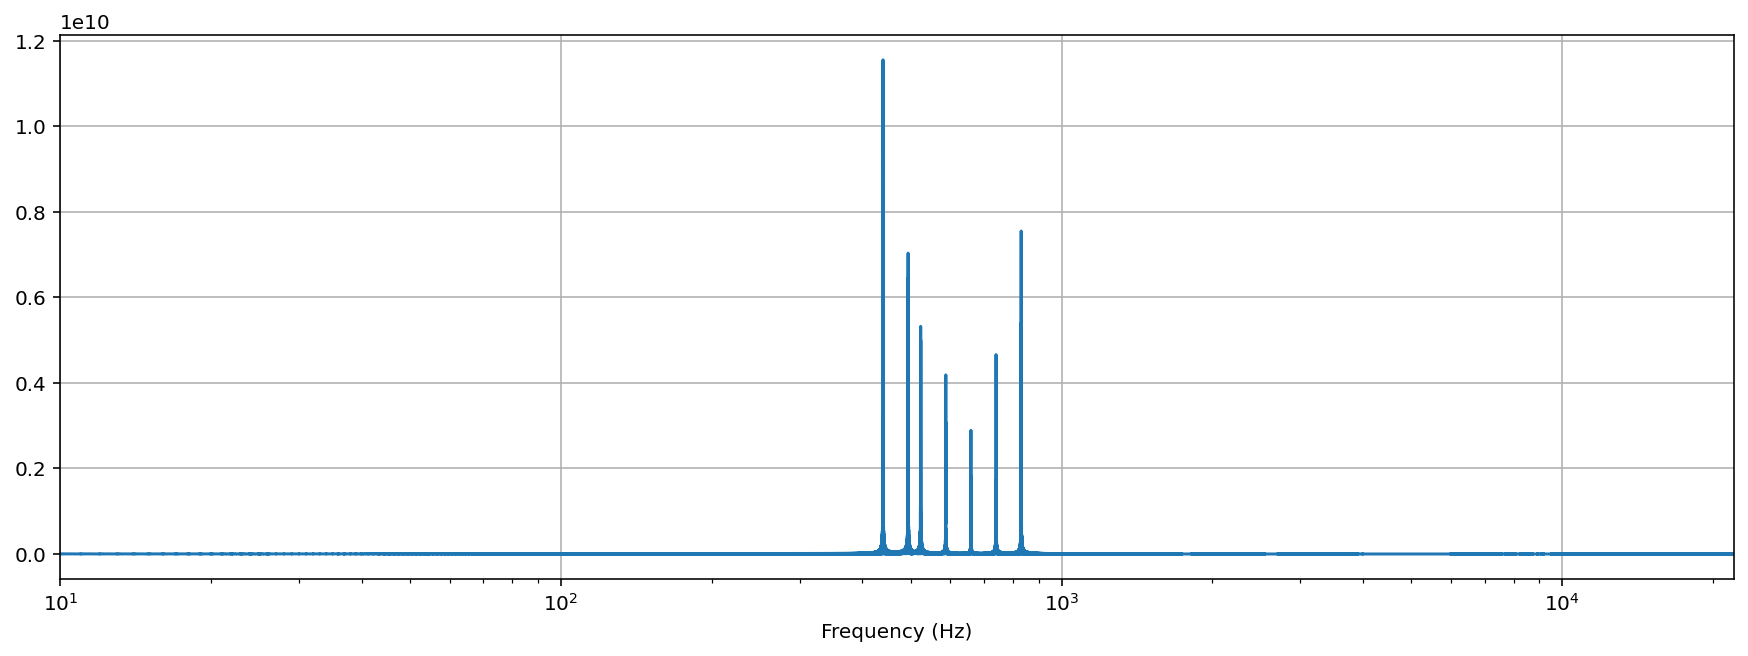

Array: Yankee Doodle Real
shape: (705600,)
dtype: int16
min, max: -32767 32767



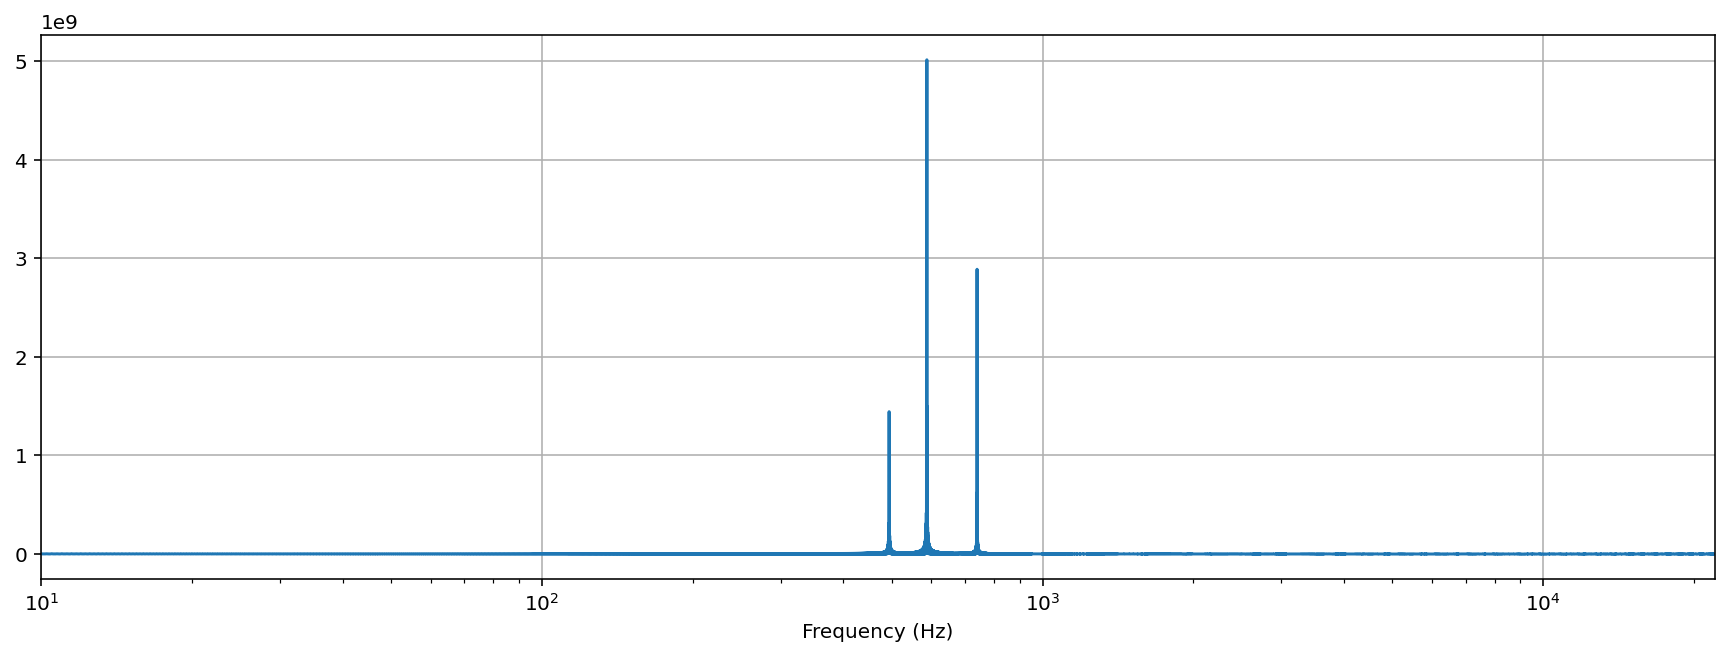

In [16]:
#To create Yankee Doodle, you would need to plug in 27 notes and hope they all show up in order and are all one kind of note.
y_d_attempt = musicGen(C_maj, 27)
#Because we don't have too much time I won't play this but
#playMusic(y_d_attempt)
filename = "yankee_doodle_attempt.wav"
Write(filename, fs, y_d_attempt)
#Most likely this isn't right, but lets see how close we came!

rate, data = wavfile.read(filename)
PrintArrayInfo(data,"Yankee Doodle")
datafft = fft(data)

#Get the absolute value of real and complex component:
fftabs = abs(datafft)
samples = data.shape[0]

freqs = fftfreq(samples,1/rate)
plt.xlim( [10, rate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

rate, data = wavfile.read("y_d_real.wav")
PrintArrayInfo(data,"Yankee Doodle Real")
datafft = fft(data)

#Get the absolute value of real and complex component:
fftabs = abs(datafft)
samples = data.shape[0]

freqs = fftfreq(samples,1/rate)
plt.xlim( [10, rate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

In [17]:
#Song Information
#Yankee Doodle- C major - 27 notes -all quarter notes
#Never Gonna -F major - 29 notes - 14 sixteenth 7 dotted eigth 5 eigth 2 quarter 1 half

In [18]:
possT = np.array([1, 2, 4])
def songTrialYD():
    correct = 0
    for i in range(27):
        r_note = random.choice(C_maj)
        r_length = random.choice(possT)
        if r_note == y_d_arr[i] and (r_length == 1):
            correct +=1
    return correct
#n = Times we try to get Yankee Doodle
def simulateYD(n):
    trials = []
    for i in range(n):
        trials.append(songTrialYD())
    return(sum(trials)/n/100)

In [19]:
simulateYD(10000)

0.012832

In [19]:
#This can be approximately replicated by the probability to choose 1 note out of 7 (octave) and 1 length out of 3
#Any descrepancies can be explained because above is a test with the actual song's data, which has a lot of repeating values.
prob_right_note = (1/7)*27 
prob_right_length = (1/3)**27 #this is different because it is the probability of choosing 1 27 times
print("Probability that each note is correct: ", prob_right_note)
print("Probability that each note length is correct: ", prob_right_length, " (extremely small)")

Probability that each note is correct:  3.8571428571428568
Probability that each note length is correct:  1.3113726523970905e-13  (extremely small)


# As you can see the probability would go even lower for songs such as Never Gonna give you up, which has 5 different types of note lengths and 29 Notes.
## The above probabilities aren't even taking in consideration the order.

# In Conclusion, A Music Generator is very possible, but unless you limit it further it is going to be near impossible to create a recognizable song.